In [49]:
import pandas as pd
import seaborn as sns

data_train_path = "../data/raw/train.csv"


data_train = pd.read_csv(filepath_or_buffer=data_train_path)

In [50]:
sns.set_theme(style="darkgrid")

## Relación entre cada atributo y el objetivo


### Cantidad de sobrevivientes por clase


In [51]:
data_survivors_by_class = data_train.copy()
data_survivors_by_class = data_survivors_by_class[["PassengerId", "Survived", "Pclass"]]

data_survivors_by_class = data_survivors_by_class.replace(
    to_replace={
        "Survived": {0: "No", 1: "Si"},
        "Pclass": {1: "Primera", 2: "Segunda", 3: "Tercera"},
    }
)
data_survivors_by_class

,PassengerId,Survived,Pclass
0,1,No,Tercera
1,2,Si,Primera
2,3,Si,Tercera
3,4,Si,Primera
4,5,No,Tercera
...,...,...,...
886,887,No,Segunda
887,888,Si,Primera
888,889,No,Tercera
889,890,Si,Primera


In [52]:
data_survivors_by_class = (
    data_survivors_by_class.rename(
        columns={
            "Pclass": "Clase",
            "Survived": "Sobreviviente",
            "PassengerId": "Cantidad",
        }
    )
    .groupby(by=["Clase", "Sobreviviente"])
    .agg(func={"Cantidad": "count"})
    .reset_index()
)


data_survivors_by_class

,Clase,Sobreviviente,Cantidad
0,Primera,No,80
1,Primera,Si,136
2,Segunda,No,97
3,Segunda,Si,87
4,Tercera,No,372
5,Tercera,Si,119


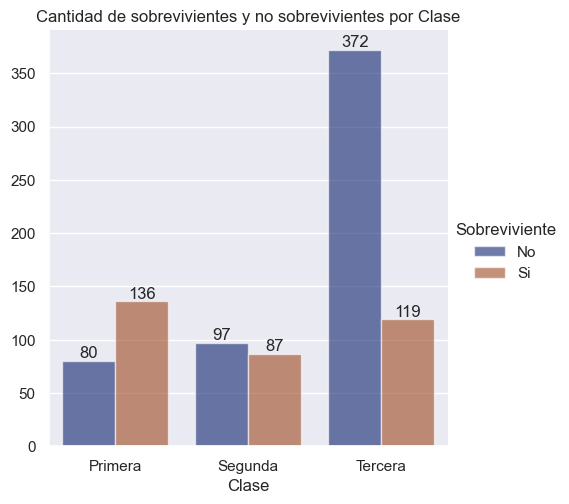

In [62]:
graph_survivors_by_class = (
    sns.catplot(
        data=data_survivors_by_class,
        x="Clase",
        y="Cantidad",
        hue="Sobreviviente",
        kind="bar",
        palette="dark",
        alpha=0.6,
    )
    .set_axis_labels(x_var="Clase", y_var="")
    .set(title="Cantidad de sobrevivientes y no sobrevivientes por Clase")
)

ax_graph_survivors_by_class = graph_survivors_by_class.ax

for container in ax_graph_survivors_by_class.containers:
    ax_graph_survivors_by_class.bar_label(container=container)